In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy.stats import norm
import matplotlib.pyplot as plt
import glob as gl
import os
import string  as string
import seaborn as sns
import random
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb

In [ ]:
# Добавляем первую строку с именем файла
#  Запускать один раз!
# path_folder = r'E:\TED\1_ok\9_vibeg_ispr\*.csv' 
# path_folder = r'E:\TED\1_ok\4_max\*.csv' 

# path_folder = r'E:\TED\2_bd\1_start\*.csv' 
# path_folder = r'E:\TED\2_bd\2_vibeg\*.csv' 
# path_folder = r'E:\TED\4_bd\4_vibeg\*.csv' 
# razgon
# path_folder = r'E:\TED\1_ok\2_razgon\*.csv' 
# path_folder = r'E:\TED\2_bd\4_razgon\*.csv' 
# path_folder = r'E:\TED\3_bd\4_razgon\*.csv' 
# path_folder = r'E:\TED\4_bd\3_razgon\*.csv' 
# files = gl.glob(path_folder)
# names = [os.path.basename(x) for x in gl.glob(path_folder)]
# st=[]
# for nm in names:
#     st.append((nm.rstrip('.csv')))
# nam = st
# names = pd.DataFrame(nam)
# # names[0]
# i=0
# for file in files:
#     b = pd.read_csv(file, header = None)
#     b.columns = nam[i].split()
#     b.to_csv(file, header = True, index = False)
#     i=i+1
    


good 1 = r'E:\TED\1_ok\3_vibeg_ispr\*.csv'  
bad2   = r'E:\TED\2_bd\2_vibeg\*.csv'
bad3   =  r'E:\TED\3_bd\3_vibeg\*.csv'
bad4  =   r'E:\TED\4_bd\4_vibeg\*.csv'

In [8]:
# Загружаем файлы в  датасет
d = pd.DataFrame()
i = 0
# ted = [r'E:\TED\1_ok\3_vibeg_ispr\*.csv']
ted = [r'E:\TED\2_bd\2_vibeg\*.csv']
# ted = [r'E:\TED\3_bd\3_vibeg\*.csv']
# ted = [r'E:\TED\4_bd\4_vibeg\*.csv']

for path_folder in ted:
    files = gl.glob(path_folder)
    names = [os.path.basename(x) for x in gl.glob(path_folder)]
    st=[]
    for nm in names:
        st.append((nm.rstrip('.csv')))
    nam = st
    # #  создаем первый датафраейм 
    dfs = pd.read_csv(files[0])
    # print(files[0])
    files.remove(files[0])
# dfs = pd.DataFrame()
    for file in files:
#     print(file)
        if len(file)>0:
                d = pd.read_csv(file)
                dfs = dfs.join(d,  how='left') 
# 
    dfs=dfs.applymap(lambda x: float((str(x).rstrip(";"))))
#     s = pd.DataFrame(dfs.stack())
# #     s.columns = str(i).split()
#     d.assign(s)
# 
dfs.head()

,_1,_10,_100,_101,_102,_103,_104,_105,_106,_107,...,_90,_91,_92,_93,_94,_95,_96,_97,_98,_99
0,326.438084,326.715825,133.163796,131.627057,128.399465,125.544900,122.292994,119.267005,115.384615,110.292006,...,159.689493,161.276774,158.111447,157.248157,152.663663,146.751592,145.730550,142.999007,140.848514,138.361758
1,325.699746,325.976231,133.010045,131.267092,128.628852,125.394579,122.059758,119.267005,115.073419,110.376545,...,159.490516,160.759140,157.829840,157.033806,152.380952,147.389969,145.491286,143.016760,140.865737,137.997125
2,325.791855,323.504634,133.410539,130.849614,128.729467,125.326371,121.801649,119.242314,114.798206,110.408281,...,160.423339,160.222531,157.570784,156.734694,151.998944,147.654448,145.197883,143.070045,140.865737,137.585095
3,326.715825,320.000000,133.828996,130.538244,128.700704,125.244618,121.608783,119.254658,114.535693,110.228686,...,159.556787,159.667360,157.312577,156.415479,151.658768,147.635525,145.069890,143.105590,140.865737,137.224538
4,326.623193,316.396594,133.596196,130.375736,128.585780,124.986438,121.531807,119.254658,114.456036,110.260337,...,157.420060,159.247996,157.098050,156.055270,151.280368,147.616607,145.088161,143.301406,141.003672,137.093895


In [9]:
# good1 = dfs.copy()
bad2 = dfs.copy()
# bad3 = dfs.copy()
# bad4 = dfs.copy()

In [10]:
good1 = good1*1.11
bad3 = bad3*1.07
bad4 = bad4*1.11

In [11]:
mass = [good1, bad2, bad3, bad4]
# mass = [bad2]
i=1
data = pd.DataFrame()
col=''
for d in mass:
    print("size", d.shape[1]) 
    size=d.shape[1]
    for k in range (size):
            col="_"+str(k+1)
            new_row = {
                "ted":i,
                "kurtosis"       : sc.stats.kurtosis (d[col], fisher = True),
                "skew"           : sc.stats.skew (d[col]),
                "pvalue"         : sc.stats.normaltest(d[col], nan_policy='propagate').pvalue,
                "peak"           : 0.5*(max(d[col])-min(d[col])),
                "std"            : np.std(d[col]),
                "mean"           : np.mean(d[col]),
                "crest factor"   : (0.5*(max(d[col])-min(d[col]))/np.std(d[col])),
                "impulse factor" :  (0.5*(max(d[col])-min(d[col]))/np.mean(d[col]))
            }
            data = data.append(new_row, ignore_index = "True")
#           
      
    i=i+1

size 145


C:\Users\Oleksandr\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Oleksandr\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Oleksandr\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Oleksandr\anaconda3\lib\site-packages\scipy\stats\stats.py:1548: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


size 80
size 97
size 66


In [12]:
# sc.stats.kurtosis (d1['val'], fisher = True)
data['target']= np.where((data.ted<2),1,0)

In [13]:
data.dropna(axis = 0, inplace = True)

In [14]:
# data.groupby("ted")["kurtosis"].mean()
data.groupby("target").count()

,ted,kurtosis,skew,pvalue,peak,std,mean,crest factor,impulse factor
target,,,,,,,,,
0,243,243,243,243,243,243,243,243,243
1,144,144,144,144,144,144,144,144,144


In [15]:
# x_field = ['kurtosis','skew', 'pvalue', 'peak','std', 'mean', 'crest factor', 'impulse factor']
x_field = ['kurtosis','skew', 'pvalue', 'peak','std', 'crest factor', 'impulse factor']
X = data[x_field]
Y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=8)
X_train.head()

,kurtosis,skew,pvalue,peak,std,crest factor,impulse factor
197,23.314014,-4.288716,9.268473e-128,69.308375,15.484890,4.475871,0.158787
376,1.470587,0.738721,6.815016e-16,25.282578,6.766708,3.736319,0.075230
232,0.493193,-1.098793,7.307847e-21,44.775422,17.243212,2.596698,0.110961
285,1.139683,-0.983924,1.851337e-20,45.231092,13.948008,3.242835,0.123203
262,1.046077,-1.128823,9.888524e-24,40.568218,15.558333,2.607491,0.105794


Accuracy: 97.66%
AUC-ROC (grad_boost) =  0.9729166666666668


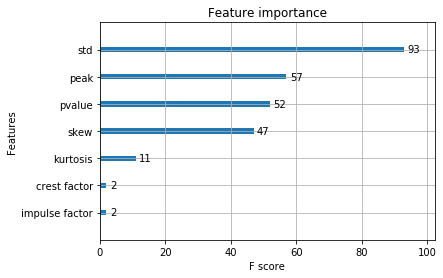

In [16]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
gb_predictions_cl = model.predict(X_test)
print ("AUC-ROC (grad_boost) = ", roc_auc_score(y_test, gb_predictions_cl))
xgb.plot_importance(model)

In [17]:
# fit a k-nearest neighbor model to the data
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
print(model_kn)
# make predictions
expected_kn = y_test
predicted_kn = model_kn.predict(X_test)
# summarize the fit of the model
#print(metrics.classification_report(expected_kn, predicted_kn))
#print(metrics.confusion_matrix(expected_kn, predicted_kn))
print ("AUC-ROC_kNN (kNN) = ", roc_auc_score(expected_kn, predicted_kn))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
AUC-ROC_kNN (kNN) =  0.9729166666666668
